In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, roc_auc_score

import warnings 
warnings.filterwarnings("ignore")

In [68]:
data = pd.read_csv('C:/Users/HP/Desktop/Mudassar/Python/Tasks/heart_disease.csv')
data

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [69]:
data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [70]:
#deleting unnamed, exang and fbs (fasting blood sugar) as it contains all zeros and ones which is not valid in medical terms.
dt=data.drop(['Unnamed: 0','fbs','exang'], axis=1)

In [71]:
dt

,age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,2.3,0,0,1,1
1,37,1,2,130,250,1,187,3.5,0,0,2,1
2,41,0,1,130,204,0,172,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0.8,2,0,2,1
4,57,0,0,120,354,1,163,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,0.2,1,0,3,0
299,45,1,3,110,264,1,132,1.2,1,0,3,0
300,68,1,0,144,193,1,141,3.4,1,2,3,0
301,57,1,0,130,131,1,115,1.2,1,1,3,0


In [72]:
dt.shape

(303, 12)

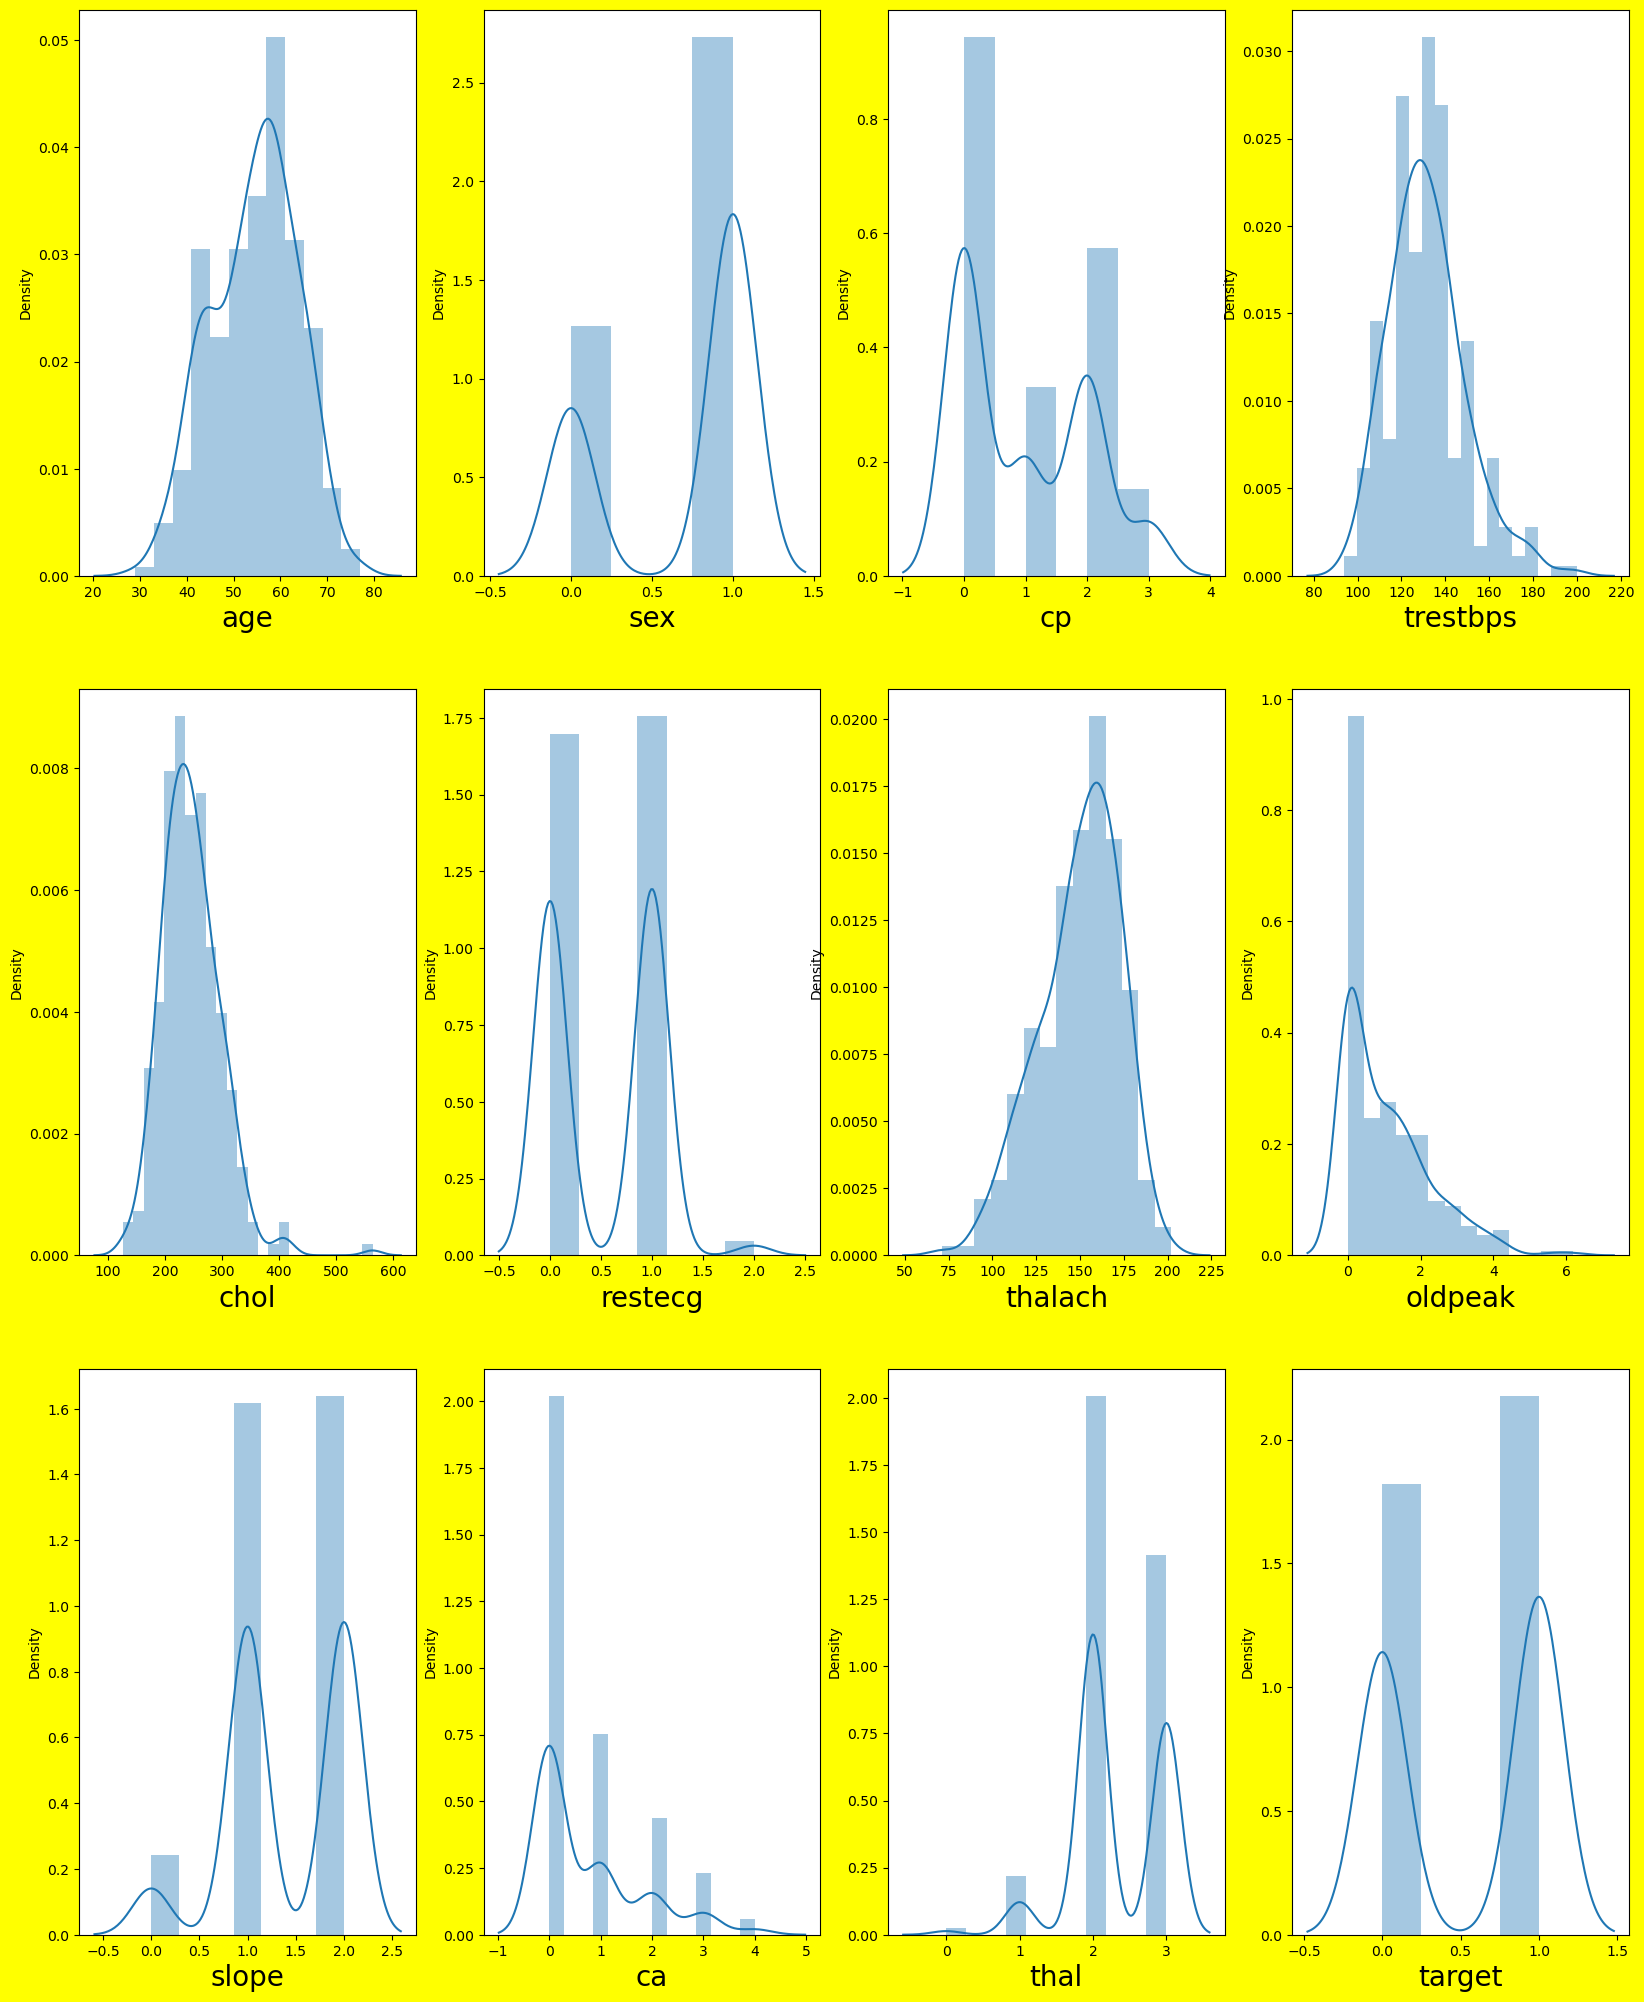

In [73]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in dt:
        if plotnumber<=12:
            ax = plt.subplot(3,4,plotnumber)
            sns.distplot(dt[column])
            plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.show()
        

In [74]:
#there is skewness in the data
df_features = dt.drop(['target'], axis=1)

In [75]:
df_features

,age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,63,1,3,145,233,0,150,2.3,0,0,1
1,37,1,2,130,250,1,187,3.5,0,0,2
2,41,0,1,130,204,0,172,1.4,2,0,2
3,56,1,1,120,236,1,178,0.8,2,0,2
4,57,0,0,120,354,1,163,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,0.2,1,0,3
299,45,1,3,110,264,1,132,1.2,1,0,3
300,68,1,0,144,193,1,141,3.4,1,2,3
301,57,1,0,130,131,1,115,1.2,1,1,3


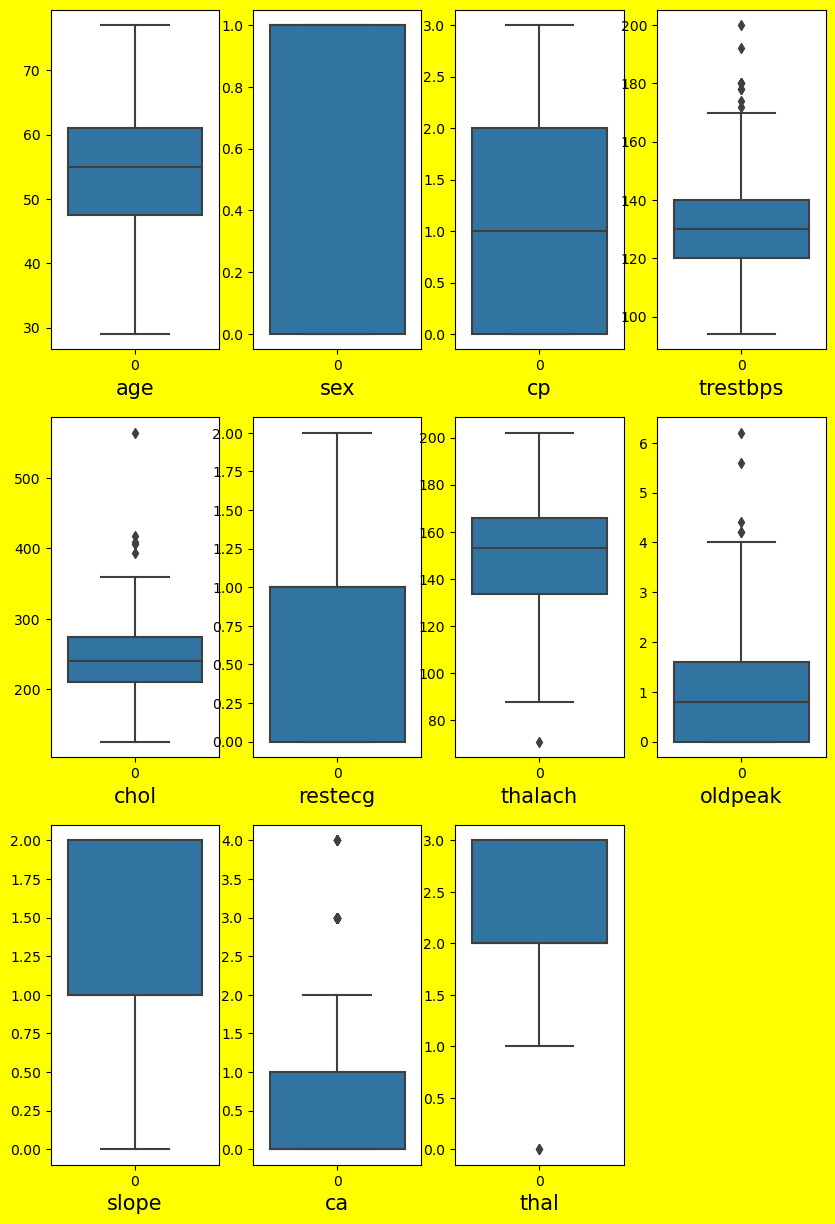

In [53]:
plt.figure(figsize=(10,15),facecolor='yellow')
graph = 1

for column in df_features:
        if graph<=12:
            plt.subplot(3,4,graph)
            ax = sns.boxplot(data=df_features[column])
            plt.xlabel(column,fontsize=15)
        
        graph+=1
plt.show()

In [76]:
#finding iqr

q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

q1

Unnamed: 0     75.5
age            47.5
sex             0.0
cp              0.0
trestbps      120.0
chol          211.0
fbs             0.0
restecg         0.0
thalach       133.5
exang           0.0
oldpeak         0.0
slope           1.0
ca              0.0
thal            2.0
target          0.0
Name: 0.25, dtype: float64

In [77]:
trestbps_high=(q3.trestbps + (1.5* iqr.trestbps))
trestbps_high

170.0

In [78]:
np_index=np.where(dt['trestbps']>trestbps_high)
np_index

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266], dtype=int64),)

In [79]:
dt=dt.drop(dt.index[np_index])
dt.reset_index()

,index,age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,0,150,2.3,0,0,1,1
1,1,37,1,2,130,250,1,187,3.5,0,0,2,1
2,2,41,0,1,130,204,0,172,1.4,2,0,2,1
3,3,56,1,1,120,236,1,178,0.8,2,0,2,1
4,4,57,0,0,120,354,1,163,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,298,57,0,0,140,241,1,123,0.2,1,0,3,0
290,299,45,1,3,110,264,1,132,1.2,1,0,3,0
291,300,68,1,0,144,193,1,141,3.4,1,2,3,0
292,301,57,1,0,130,131,1,115,1.2,1,1,3,0


In [80]:
chol_high=(q3.chol + (1.5* iqr.chol))
chol_high
np_index=np.where(dt['chol']>chol_high)
np_index
dt=dt.drop(dt.index[np_index])
dt.reset_index()

,index,age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,0,150,2.3,0,0,1,1
1,1,37,1,2,130,250,1,187,3.5,0,0,2,1
2,2,41,0,1,130,204,0,172,1.4,2,0,2,1
3,3,56,1,1,120,236,1,178,0.8,2,0,2,1
4,4,57,0,0,120,354,1,163,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,298,57,0,0,140,241,1,123,0.2,1,0,3,0
285,299,45,1,3,110,264,1,132,1.2,1,0,3,0
286,300,68,1,0,144,193,1,141,3.4,1,2,3,0
287,301,57,1,0,130,131,1,115,1.2,1,1,3,0


In [81]:
oldpeak_high=(q3.chol + (1.5* iqr.chol))
oldpeak_high
np_index=np.where(dt['oldpeak']>oldpeak_high)
np_index
dt=dt.drop(dt.index[np_index])
dt.reset_index()

,index,age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,0,150,2.3,0,0,1,1
1,1,37,1,2,130,250,1,187,3.5,0,0,2,1
2,2,41,0,1,130,204,0,172,1.4,2,0,2,1
3,3,56,1,1,120,236,1,178,0.8,2,0,2,1
4,4,57,0,0,120,354,1,163,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,298,57,0,0,140,241,1,123,0.2,1,0,3,0
285,299,45,1,3,110,264,1,132,1.2,1,0,3,0
286,300,68,1,0,144,193,1,141,3.4,1,2,3,0
287,301,57,1,0,130,131,1,115,1.2,1,1,3,0


In [82]:
dt

,age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,2.3,0,0,1,1
1,37,1,2,130,250,1,187,3.5,0,0,2,1
2,41,0,1,130,204,0,172,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0.8,2,0,2,1
4,57,0,0,120,354,1,163,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,0.2,1,0,3,0
299,45,1,3,110,264,1,132,1.2,1,0,3,0
300,68,1,0,144,193,1,141,3.4,1,2,3,0
301,57,1,0,130,131,1,115,1.2,1,1,3,0


In [83]:
X=dt.drop(columns=['target'])
y=dt['target']

In [84]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [85]:
X_scaled.shape[1]

11

In [87]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["features"]=X.columns

vif

,vif,features
0,1.422750,age
1,1.121238,sex
2,1.171975,cp
3,1.139718,trestbps
4,1.080316,chol
5,1.055052,restecg
6,1.534737,thalach
7,1.623075,oldpeak
8,1.583066,slope
9,1.182121,ca


In [89]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=910)

In [90]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [91]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [92]:
log_reg.predict_proba(x_test)

array([[0.14167586, 0.85832414],
       [0.01096867, 0.98903133],
       [0.87459205, 0.12540795],
       [0.10253382, 0.89746618],
       [0.03125734, 0.96874266],
       [0.10614593, 0.89385407],
       [0.04017234, 0.95982766],
       [0.80685058, 0.19314942],
       [0.05759826, 0.94240174],
       [0.02967351, 0.97032649],
       [0.21852065, 0.78147935],
       [0.10396057, 0.89603943],
       [0.9456777 , 0.0543223 ],
       [0.98592392, 0.01407608],
       [0.01160469, 0.98839531],
       [0.15686803, 0.84313197],
       [0.9924389 , 0.0075611 ],
       [0.32749527, 0.67250473],
       [0.99776342, 0.00223658],
       [0.5274844 , 0.4725156 ],
       [0.08037799, 0.91962201],
       [0.43691586, 0.56308414],
       [0.19498404, 0.80501596],
       [0.97889143, 0.02110857],
       [0.02531884, 0.97468116],
       [0.96748704, 0.03251296],
       [0.32084725, 0.67915275],
       [0.06197768, 0.93802232],
       [0.71206337, 0.28793663],
       [0.24245857, 0.75754143],
       [0.

In [93]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[23,  9],
       [ 1, 40]], dtype=int64)

In [94]:
accuracy=accuracy_score(y_test,y_pred)

In [95]:
accuracy

0.863013698630137

In [96]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82        32
           1       0.82      0.98      0.89        41

    accuracy                           0.86        73
   macro avg       0.89      0.85      0.86        73
weighted avg       0.88      0.86      0.86        73

